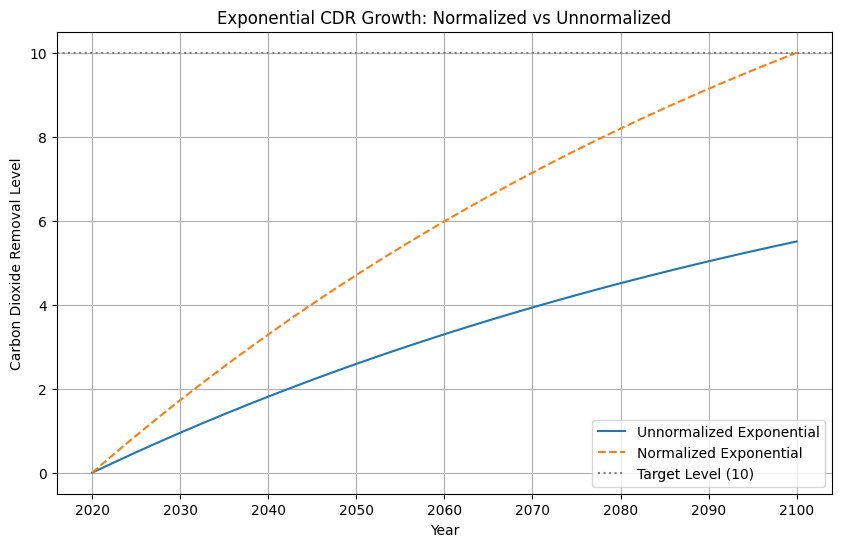

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
start_year = 2020
final_year = 2100
target_level = 10    # target CDR in the year 2100
k = 0.01             # growth rate constant; choose a small k to clearly see the difference

# Create an array of years from start to final
years = np.linspace(start_year, final_year, num=500)

# Unnormalized exponential growth:
# f(t) = target_level * (1 - exp(-k*(t - start_year)))
cdr_unnormalized = target_level * (1 - np.exp(-k * (years - start_year)))

# Normalized exponential growth:
# g(t) = target_level * (1 - exp(-k*(t - start_year))) / (1 - exp(-k*(final_year - start_year)))
denom = 1 - np.exp(-k * (final_year - start_year))
cdr_normalized = target_level * (1 - np.exp(-k * (years - start_year))) / denom

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(years, cdr_unnormalized, label="Unnormalized Exponential")
plt.plot(years, cdr_normalized, label="Normalized Exponential", linestyle='--')
plt.axhline(y=target_level, color='gray', linestyle=':', label="Target Level (10)")
plt.xlabel("Year")
plt.ylabel("Carbon Dioxide Removal Level")
plt.title("Exponential CDR Growth: Normalized vs Unnormalized")
plt.legend()
plt.grid(True)
plt.show()


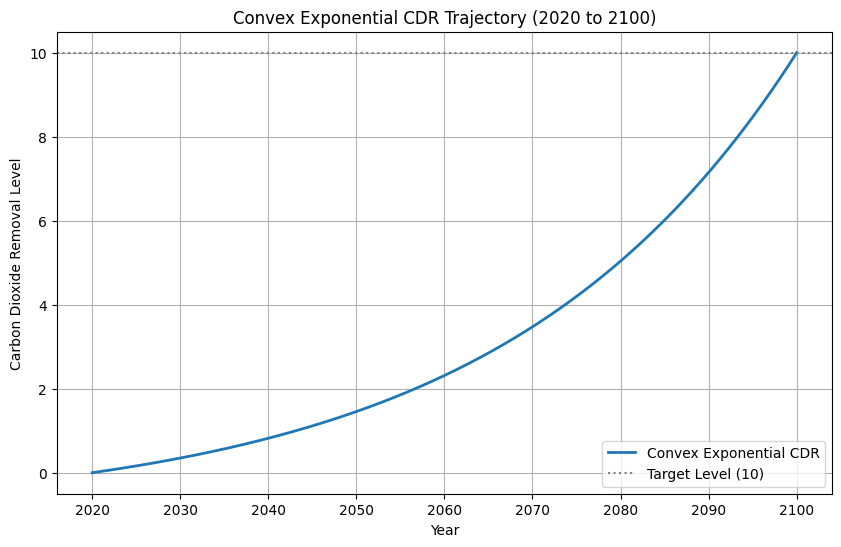

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
start_year = 2020
final_year = 2100
target_level = 10    # target CDR in the year 2100
k = 0.03             # growth rate constant

# Create an array of years from start to final.
years = np.linspace(start_year, final_year, 500)

# Convex exponential growth function:
# CDR(t) = target_level * (exp(k*(t - start_year)) - 1) / (exp(k*(final_year - start_year)) - 1)
cdr_convex = target_level * (np.exp(k * (years - start_year)) - 1) / (np.exp(k * (final_year - start_year)) - 1)

# Plotting the convex trajectory
plt.figure(figsize=(10, 6))
plt.plot(years, cdr_convex, label="Convex Exponential CDR", linewidth=2)
plt.axhline(y=target_level, color='gray', linestyle=':', label="Target Level (10)")
plt.xlabel("Year")
plt.ylabel("Carbon Dioxide Removal Level")
plt.title("Convex Exponential CDR Trajectory (2020 to 2100)")
plt.legend()
plt.grid(True)
plt.show()


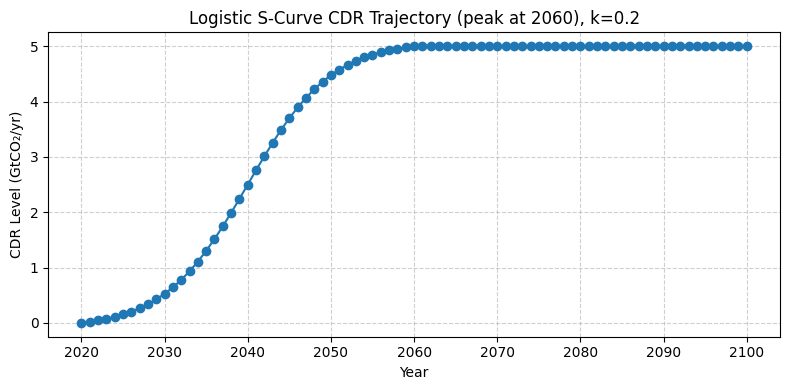

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def compute_global_cdr_trajectory_logistic(start_year, cdr_level_2100, k=0.1, t0=None):
    """
    Logistic S-curve for CDR that ramps from 0 at start_year to full level at 2060,
    then holds that level through 2100.

    Parameters:
      start_year       – first year (int)
      cdr_level_2100   – max CDR level (float)
      k                – steepness of the logistic (float, default 0.1)
      t0               – inflection year (defaults to midpoint of start_year & 2060)

    Returns:
      dict[int, float]: {year: CDR value}
    """
    start = start_year
    peak  = 2060
    final = 2100
    L     = cdr_level_2100

    # default t0 to the midpoint between start and peak
    if t0 is None:
        t0 = start + 0.5 * (peak - start)

    years = np.arange(start, final + 1)
    raw   = 1 / (1 + np.exp(-k * (years - t0)))

    # values at start and at peak for rescaling
    raw_start = 1 / (1 + np.exp(-k * (start - t0)))
    raw_peak  = 1 / (1 + np.exp(-k * (peak  - t0)))

    # normalize to [0,1] over [start → peak], then scale to [0 → L]
    norm = (raw - raw_start) / (raw_peak - raw_start)
    norm = np.clip(norm, 0, 1)

    cdr_vals = norm * L
    return {int(yr): float(val) for yr, val in zip(years, cdr_vals)}


# --- Test and plot ---
if __name__ == "__main__":
    start_year      = 2020
    cdr_level_2100  = 5   # GtCO₂/yr max
    k               = 0.2  # curve steepness
    t0              = None # use midpoint (will default to (2020+2060)/2 = 2040)

    trajectory = compute_global_cdr_trajectory_logistic(start_year, cdr_level_2100, k=k, t0=t0)
    years      = list(trajectory.keys())
    values     = list(trajectory.values())

    plt.figure(figsize=(8, 4))
    plt.plot(years, values, marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('CDR Level (GtCO₂/yr)')
    plt.title(f'Logistic S-Curve CDR Trajectory (peak at 2060), k={k}')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    #save graph as png CDR trajectory
    plt.savefig('cdr_trajectory_logistic.png', dpi=300, bbox_inches='tight')
    plt.show()


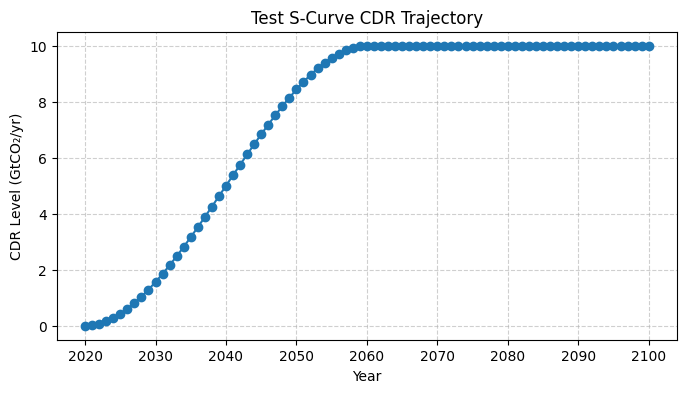

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def compute_global_cdr_trajectory(start_year, cdr_level_2100):
    """
    S-curve CDR trajectory: ramp from zero at start_year to full by 2060, then hold.
    """
    start = start_year
    peak = 2060
    max_level = cdr_level_2100
    final_year = 2100

    years = np.arange(start, final_year + 1)
    trajectory = {}
    span = peak - start
    if span <= 0:
        raise ValueError("start_year must be less than 2060")

    for t in years:
        if t <= start:
            cdr_t = 0.0
        elif t < peak:
            u = (t - start) / span
            f = 3 * u**2 - 2 * u**3  # smoothstep
            cdr_t = max_level * f
        else:
            cdr_t = max_level

        trajectory[int(t)] = cdr_t

    return trajectory

# Test and plot
start_year = 2020
cdr_level_2100 = 10  # e.g., 10 GtCO₂/year
trajectory = compute_global_cdr_trajectory(start_year, cdr_level_2100)

years = list(trajectory.keys())
values = list(trajectory.values())

plt.figure(figsize=(8, 4))
plt.plot(years, values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('CDR Level (GtCO₂/yr)')
plt.title('Test S-Curve CDR Trajectory')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
